<a href="https://colab.research.google.com/github/kosei-s/MachineLearningPractice/blob/master/tensorflow_keras/study_202002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = a + b

graph = tf.get_default_graph()
print(graph.as_graph_def())

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 13
        }
      }
    }
  }
}
node {
  name: "y"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 1
        }
      }
    }
  }
}
node {
  name: "random_normal/shape"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 2
          }
        }
        tensor_content: "\r\000\000\000\001\000\000\000"
      }
    }
  }
}
node {
  name: "random_normal/mean"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }

In [6]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 2us/step


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23429 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20303 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_ag

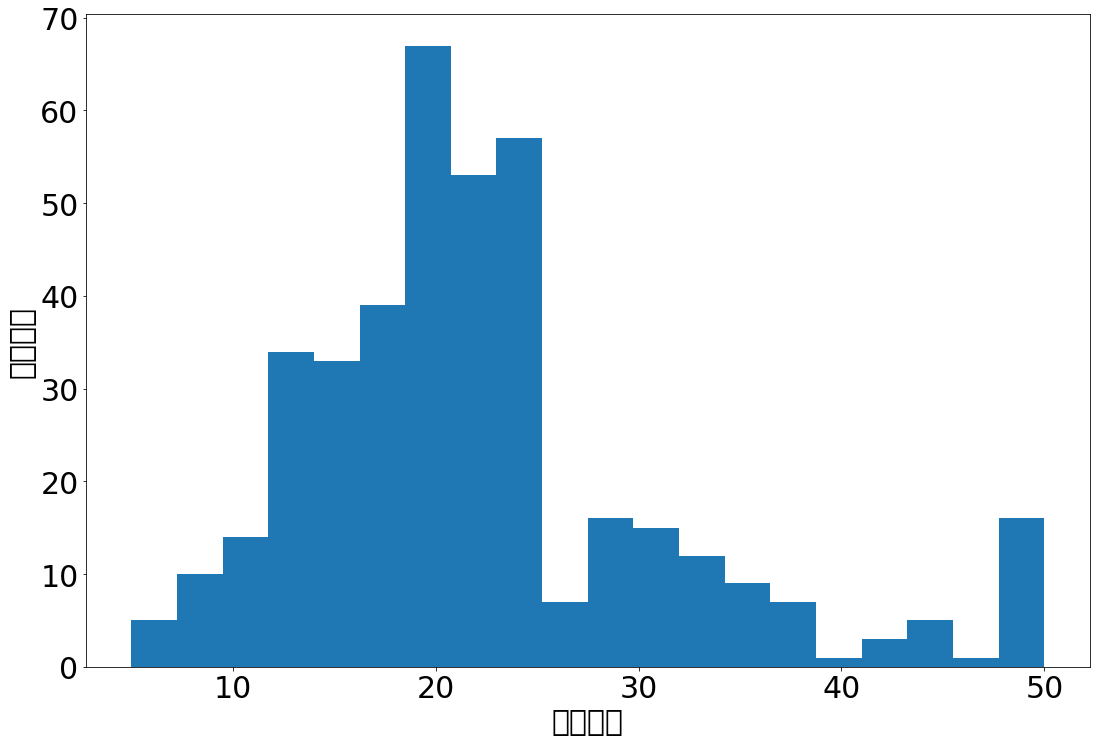

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 37096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 37096 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 23627 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text

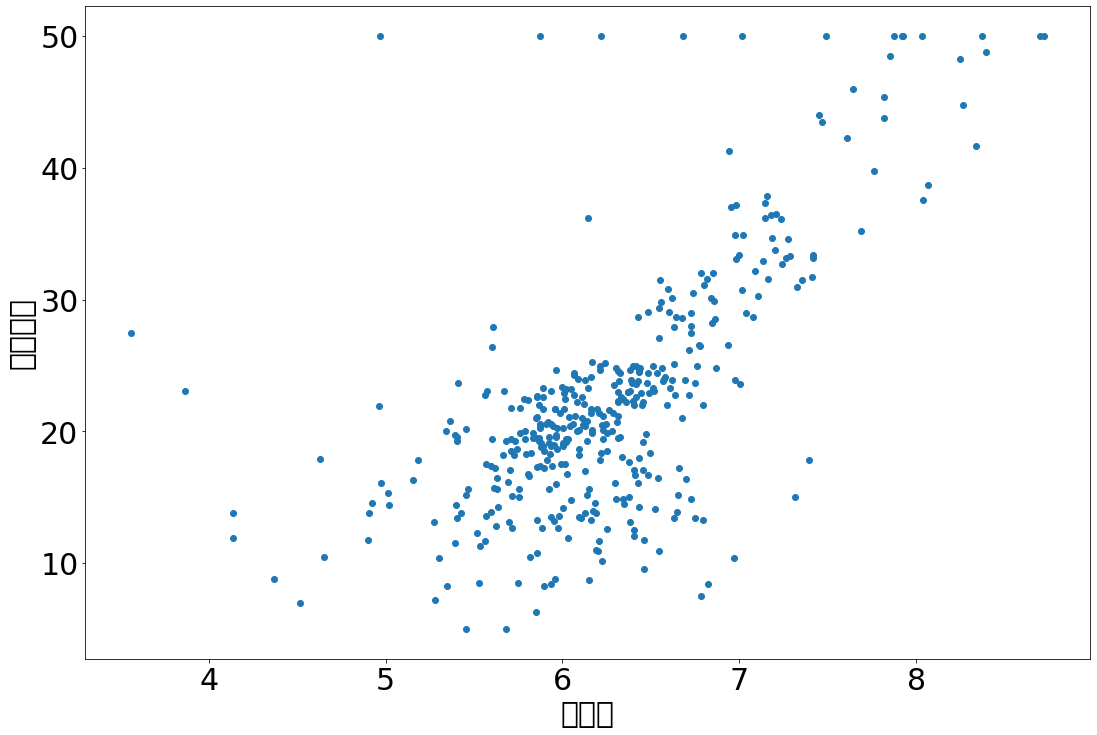

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10*3
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['font.family'] = ['IPAexGothic']

plt.hist(y_train, bins=20)
plt.xlabel('住宅価格')
plt.ylabel('データ数')
plt.show()
plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('部屋数')
plt.ylabel('住宅価格')
plt.show()

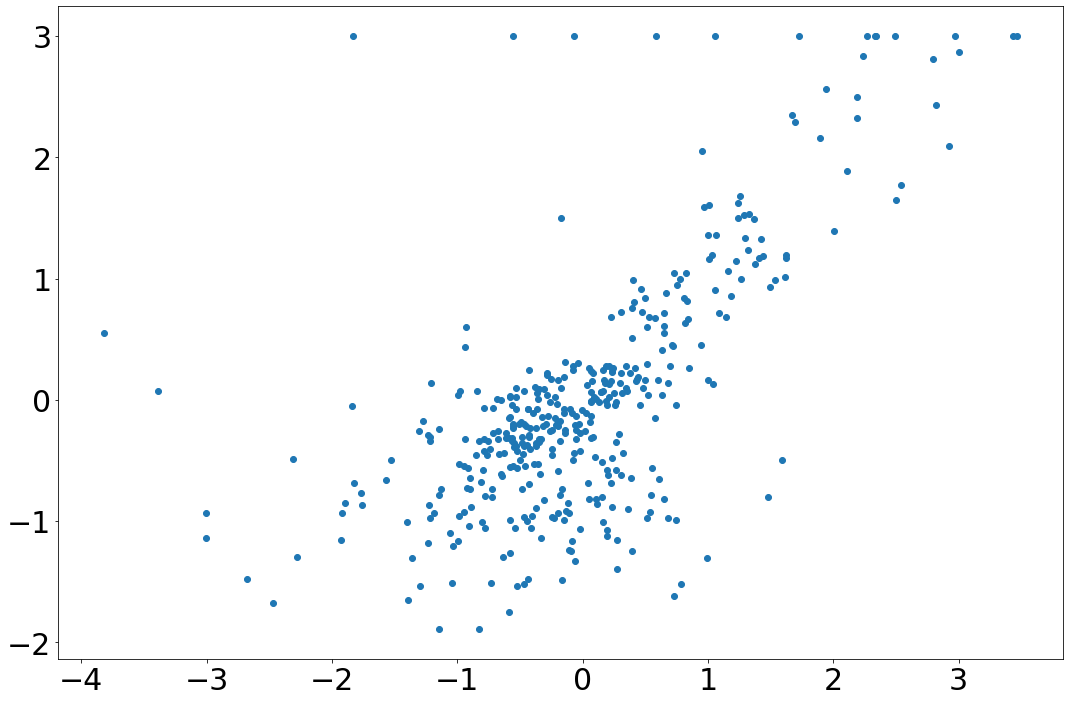

In [8]:
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
y_train_mean = y_train.mean()
y_train_std = y_train.std()

x_train = (x_train - x_train_mean) / x_train_std
y_train = (y_train - y_train_mean) / y_train_std
x_test = (x_test - x_train_mean) / x_train_std
y_test = (y_test - y_train_mean) / y_train_std

plt.plot(x_train[:, 5], y_train, 'o')

モデルの定義


In [2]:
import tensorflow as tf

x = tf.placeholder(tf.float32, (None, 13), name='x')
y = tf.placeholder(tf.float32, (None, 1), name='y')

w = tf.Variable(tf.random_normal((13, 1)))
pred = tf.matmul(x, w)

損失関数の定義

In [3]:
loss = tf.reduce_mean((y - pred)**2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_step = optimizer.minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


学習

In [9]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(100):
    train_loss, _ = sess.run(
        [loss, train_step],
        feed_dict={
            x: x_train,
            y: y_train.reshape((-1, 1))
        }
    )
    print(f'step: {step}, train_loss:{train_loss}')
  
  pred_ = sess.run(
      pred,
      feed_dict={
          x: x_test
      }
  )

step: 0, train_loss:22.83742904663086
step: 1, train_loss:7.970884799957275
step: 2, train_loss:5.3214006423950195
step: 3, train_loss:3.929654359817505
step: 4, train_loss:2.992539167404175
step: 5, train_loss:2.3366000652313232
step: 6, train_loss:1.8686670064926147
step: 7, train_loss:1.5289121866226196
step: 8, train_loss:1.2778346538543701
step: 9, train_loss:1.0890004634857178
step: 10, train_loss:0.9445040225982666
step: 11, train_loss:0.8320673704147339
step: 12, train_loss:0.7431680560112
step: 13, train_loss:0.6718165874481201
step: 14, train_loss:0.6137502193450928
step: 15, train_loss:0.5658965110778809
step: 16, train_loss:0.526011049747467
step: 17, train_loss:0.49243319034576416
step: 18, train_loss:0.4639166593551636
step: 19, train_loss:0.4395139217376709
step: 20, train_loss:0.4184945821762085
step: 21, train_loss:0.4002874791622162
step: 22, train_loss:0.38444095849990845
step: 23, train_loss:0.37059256434440613
step: 24, train_loss:0.35844841599464417
step: 25, trai